In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

df = pd.read_csv("./Data/train.csv")
df

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A 0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000
...,...,...,...,...,...,...,...,...,...
2623,2623,A1,B0,C2,D1,0,E1,F2,102100
2624,2624,A0,B0,C8,D1,0,E1,F2,129300
2625,2625,A0,BO,C7,D1,100,E1,F2,275300
2626,2626,A0,B0,C11,D1,100,E1,F2,150000


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     2628 non-null   int64 
 1   col_0   2489 non-null   object
 2   col_1   2542 non-null   object
 3   col_2   2628 non-null   object
 4   col_3   2628 non-null   object
 5   col_4   2628 non-null   int64 
 6   col_5   2628 non-null   object
 7   col_6   2516 non-null   object
 8   y       2628 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 184.9+ KB


In [481]:
df.isnull().sum()

UID        0
col_0    139
col_1     86
col_2      0
col_3      0
col_4      0
col_5      0
col_6    112
y          0
dtype: int64

### So from the initial exploration we can see that col_0, col_1 and col_6 have null values and these columns have categorical values

In [482]:
for col in df.columns:
    print(df[col].unique())

[   0    1    2 ... 2625 2626 2627]
['A 0' 'A1' 'A0' 'A2' 'AO' nan ' A2   ' 'A0   ' 'A 1' ' A0   ' 'A3'
 'A2   ' 'A 2' 'A1   ' 'A 3   ' ' A3   ' ' A1   ' 'A   3']
['B0' 'B 0' ' B0   ' nan 'B0   ' 'B2' 'B3' 'BO' 'B1' 'B   3' 'B1   ']
['C2' 'C11' 'C18' 'C67' 'C4' 'C52' 'C7' 'C36' 'C57' 'C9' 'C54' 'C41' 'C44'
 'C15' 'C39' 'C40' 'C59' 'C27' 'C29' 'C3' 'C49' 'C33' 'C6' 'C53' 'C12'
 'C1' 'C56' 'C30' 'C81' 'C26' 'C35' 'C22' 'C34' 'C58' 'C21' 'C47' 'C20'
 'C28' 'C50' 'C89' 'C62' 'C92' 'C38' 'C19' 'C0' 'C70' 'C87' 'C69' 'C76'
 'C48' 'C55' 'C85' 'C17' 'C25' 'C16' 'C63' 'C13' 'C46' 'C37' 'C90' 'C86'
 'C31' 'C71' 'C83' 'C45' 'C61' 'C23' 'C88' 'C24' 'C51' 'C72' 'C65' 'C60'
 'C64' 'C82' 'C68' 'C79' 'C5' 'C10' 'C77' 'C42' 'C43' 'C75' 'C8' 'C91'
 'C80' 'C74' 'C14' 'C78' 'C66']
['D1' 'D4' 'D0' 'D8' 'D2' 'D41' 'D12' 'D6' 'D53' 'D48' 'D66' 'D26' 'D42'
 'D36' 'D68' 'D54' 'D9' 'D5' 'D55' 'D3' 'D75' 'D21' 'D24' 'D40' 'D16'
 'D39' 'D58' 'D71' 'D32' 'D72' 'D15' 'D13' 'D31' 'D51' 'D76' 'D20' 'D22'
 'D46' 'D10'

In [483]:
df.col_0.unique()

array(['A 0', 'A1', 'A0', 'A2', 'AO', nan, ' A2   ', 'A0   ', 'A 1',
       ' A0   ', 'A3', 'A2   ', 'A 2', 'A1   ', 'A 3   ', ' A3   ',
       ' A1   ', 'A   3'], dtype=object)

In [484]:
cols = ['col_0', 'col_1', 'col_6']
for col in cols:
    df[col] = df[col].str.strip()
    
for col in df.columns:
    print(df[col].unique())

[   0    1    2 ... 2625 2626 2627]
['A 0' 'A1' 'A0' 'A2' 'AO' nan 'A 1' 'A3' 'A 2' 'A 3' 'A   3']
['B0' 'B 0' nan 'B2' 'B3' 'BO' 'B1' 'B   3']
['C2' 'C11' 'C18' 'C67' 'C4' 'C52' 'C7' 'C36' 'C57' 'C9' 'C54' 'C41' 'C44'
 'C15' 'C39' 'C40' 'C59' 'C27' 'C29' 'C3' 'C49' 'C33' 'C6' 'C53' 'C12'
 'C1' 'C56' 'C30' 'C81' 'C26' 'C35' 'C22' 'C34' 'C58' 'C21' 'C47' 'C20'
 'C28' 'C50' 'C89' 'C62' 'C92' 'C38' 'C19' 'C0' 'C70' 'C87' 'C69' 'C76'
 'C48' 'C55' 'C85' 'C17' 'C25' 'C16' 'C63' 'C13' 'C46' 'C37' 'C90' 'C86'
 'C31' 'C71' 'C83' 'C45' 'C61' 'C23' 'C88' 'C24' 'C51' 'C72' 'C65' 'C60'
 'C64' 'C82' 'C68' 'C79' 'C5' 'C10' 'C77' 'C42' 'C43' 'C75' 'C8' 'C91'
 'C80' 'C74' 'C14' 'C78' 'C66']
['D1' 'D4' 'D0' 'D8' 'D2' 'D41' 'D12' 'D6' 'D53' 'D48' 'D66' 'D26' 'D42'
 'D36' 'D68' 'D54' 'D9' 'D5' 'D55' 'D3' 'D75' 'D21' 'D24' 'D40' 'D16'
 'D39' 'D58' 'D71' 'D32' 'D72' 'D15' 'D13' 'D31' 'D51' 'D76' 'D20' 'D22'
 'D46' 'D10' 'D29' 'D19' 'D56' 'D62' 'D7' 'D23' 'D34' 'D38' 'D77' 'D64'
 'D14' 'D60' 'D37' 'D44' 'D28

In [485]:
for col in cols:
    print(f"{col} : {df[col].unique()}")

col_0 : ['A 0' 'A1' 'A0' 'A2' 'AO' nan 'A 1' 'A3' 'A 2' 'A 3' 'A   3']
col_1 : ['B0' 'B 0' nan 'B2' 'B3' 'BO' 'B1' 'B   3']
col_6 : ['F2' 'F0' 'F1' nan 'F 2' 'F 0' 'FO' 'F 1']


In [486]:
df['col_0'] = df['col_0'].replace({'A 0': 'A0', 'AO': 'A0', 'A 1':'A1', 'A 2':'A2', 'A 3':'A3', 'A   3':'A3'})
df['col_1'] = df['col_1'].replace({'B 0': 'B0', 'BO': 'B0', 'B   3': 'B3'})
df['col_6'] = df['col_6'].replace({'F 2': 'F2', 'F 0': 'F0', 'FO': 'F0', 'F 1':'F1'})

In [487]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

UID : [   0    1    2 ... 2625 2626 2627]
col_0 : ['A0' 'A1' 'A2' nan 'A3']
col_1 : ['B0' nan 'B2' 'B3' 'B1']
col_2 : ['C2' 'C11' 'C18' 'C67' 'C4' 'C52' 'C7' 'C36' 'C57' 'C9' 'C54' 'C41' 'C44'
 'C15' 'C39' 'C40' 'C59' 'C27' 'C29' 'C3' 'C49' 'C33' 'C6' 'C53' 'C12'
 'C1' 'C56' 'C30' 'C81' 'C26' 'C35' 'C22' 'C34' 'C58' 'C21' 'C47' 'C20'
 'C28' 'C50' 'C89' 'C62' 'C92' 'C38' 'C19' 'C0' 'C70' 'C87' 'C69' 'C76'
 'C48' 'C55' 'C85' 'C17' 'C25' 'C16' 'C63' 'C13' 'C46' 'C37' 'C90' 'C86'
 'C31' 'C71' 'C83' 'C45' 'C61' 'C23' 'C88' 'C24' 'C51' 'C72' 'C65' 'C60'
 'C64' 'C82' 'C68' 'C79' 'C5' 'C10' 'C77' 'C42' 'C43' 'C75' 'C8' 'C91'
 'C80' 'C74' 'C14' 'C78' 'C66']
col_3 : ['D1' 'D4' 'D0' 'D8' 'D2' 'D41' 'D12' 'D6' 'D53' 'D48' 'D66' 'D26' 'D42'
 'D36' 'D68' 'D54' 'D9' 'D5' 'D55' 'D3' 'D75' 'D21' 'D24' 'D40' 'D16'
 'D39' 'D58' 'D71' 'D32' 'D72' 'D15' 'D13' 'D31' 'D51' 'D76' 'D20' 'D22'
 'D46' 'D10' 'D29' 'D19' 'D56' 'D62' 'D7' 'D23' 'D34' 'D38' 'D77' 'D64'
 'D14' 'D60' 'D37' 'D44' 'D28' 'D45' 'D59' 'D47

In [488]:
df

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000
...,...,...,...,...,...,...,...,...,...
2623,2623,A1,B0,C2,D1,0,E1,F2,102100
2624,2624,A0,B0,C8,D1,0,E1,F2,129300
2625,2625,A0,B0,C7,D1,100,E1,F2,275300
2626,2626,A0,B0,C11,D1,100,E1,F2,150000


In [489]:
def transform_categorical_data(df, high_cardinality_cols, low_cardinality_cols):
    """
    Transform categorical data in a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - high_cardinality_cols: List of column names with high cardinality (more than 50 classes).
    - low_cardinality_cols: List of column names with low cardinality (3-4 classes).

    Returns:
    - Transformed DataFrame.
    """
    
    # Copy the original DataFrame to avoid modifying it
    transformed_df = df.copy()
    
    # One-Hot Encoding for low cardinality features
    for col in low_cardinality_cols:
        encoder = OneHotEncoder(sparse=False, drop='first')
        encoded_features = encoder.fit_transform(transformed_df[col].values.reshape(-1, 1))
        encoded_df = pd.DataFrame(encoded_features, columns=[f'{col}_{i}' for i in range(encoded_features.shape[1])])
        transformed_df = pd.concat([transformed_df, encoded_df], axis=1)
        transformed_df.drop(col, axis=1, inplace=True)
    
    # Frequency Encoding for high cardinality features
    for col in high_cardinality_cols:
        frequency_mapping = df[col].value_counts(normalize=True).to_dict()
        transformed_df[col] = transformed_df[col].map(frequency_mapping)
    
    return transformed_df

df = df.drop('UID', axis=1)
highCols = ['col_2', 'col_3', 'col_5']
loswCols = ['col_0', 'col_1', 'col_4', 'col_6']

transformed_df = transform_categorical_data(df, highCols, loswCols)
transformed_df

,col_2,col_3,col_5,y,col_0_0,col_0_1,col_0_2,col_0_3,col_1_0,col_1_1,col_1_2,col_1_3,col_4_0,col_4_1,col_6_0,col_6_1,col_6_2
0,0.223364,0.796423,0.806697,237000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.277017,0.044140,0.046043,86193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.022451,0.023212,0.021689,169200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.277017,0.796423,0.806697,58000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.002664,0.796423,0.806697,235000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,0.223364,0.796423,0.806697,102100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2624,0.001142,0.796423,0.806697,129300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2625,0.028919,0.796423,0.806697,275300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2626,0.277017,0.796423,0.806697,150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [490]:
for col in transformed_df.columns:
    print(f"{col} : {transformed_df[col].unique()}")

col_2 : [0.22336377 0.27701674 0.02245053 0.00266362 0.15829528 0.00342466
 0.02891933 0.07762557 0.00228311 0.00076104 0.00038052 0.02929985
 0.00190259 0.00152207 0.00761035 0.01674277 0.00989346 0.00418569
 0.00494673 0.00951294 0.01445967 0.00114155 0.00684932 0.00304414
 0.00380518 0.00532725]
col_3 : [7.96423135e-01 4.41400304e-02 2.32115677e-02 3.80517504e-03
 2.28310502e-02 1.14155251e-03 8.75190259e-03 2.05479452e-02
 1.90258752e-03 7.61035008e-04 3.80517504e-04 5.70776256e-03
 2.66362253e-03 1.52207002e-03 4.18569254e-03 2.28310502e-03
 1.29375951e-02 3.42465753e-03]
col_5 : [8.06697108e-01 4.60426180e-02 2.16894977e-02 2.66362253e-03
 2.35920852e-02 3.04414003e-03 7.99086758e-03 1.67427702e-02
 1.90258752e-03 3.80517504e-04 7.61035008e-04 4.56621005e-03
 1.14155251e-03 2.28310502e-03 3.80517504e-03 1.44596651e-02
 1.52207002e-03]
y : [237000  86193 169200  58000 235000 170000 183600 100000 175000 136000
  55685 120000 150000 152000  72000 140000 130000 248400 212200 127467
 

### Imputing Missing Values

There are 6 categorical columns

In [491]:
#cat_cols = ['col_0', 'col_1','col_2','col_3','col_5','col_6']

In [492]:
"""# Calculate the mode (most frequent value) of the column
for col in cols:
    mode_value = df[col].mode()[0]
    print(mode_value)
    df[col].fillna(mode_value, inplace=True)

# Fill missing values with the mode
df['column_name'].fillna(mode_value, inplace=True)"""

"# Calculate the mode (most frequent value) of the column\nfor col in cols:\n    mode_value = df[col].mode()[0]\n    print(mode_value)\n    df[col].fillna(mode_value, inplace=True)\n\n# Fill missing values with the mode\ndf['column_name'].fillna(mode_value, inplace=True)"

In [493]:
df.isnull().sum()

col_0    139
col_1     86
col_2      0
col_3      0
col_4      0
col_5      0
col_6    112
y          0
dtype: int64

In [494]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,A0,B0,C2,D1,100,E1,F2,237000
1,A1,B0,C11,D4,100,E4,F2,86193
2,A0,B0,C18,D0,0,E0,F2,169200
3,A2,B0,C11,D1,100,E1,F2,58000
4,A0,B0,C67,D1,0,E1,F2,235000
...,...,...,...,...,...,...,...,...
2623,A1,B0,C2,D1,0,E1,F2,102100
2624,A0,B0,C8,D1,0,E1,F2,129300
2625,A0,B0,C7,D1,100,E1,F2,275300
2626,A0,B0,C11,D1,100,E1,F2,150000


In [495]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

col_0 : ['A0' 'A1' 'A2' nan 'A3']
col_1 : ['B0' nan 'B2' 'B3' 'B1']
col_2 : ['C2' 'C11' 'C18' 'C67' 'C4' 'C52' 'C7' 'C36' 'C57' 'C9' 'C54' 'C41' 'C44'
 'C15' 'C39' 'C40' 'C59' 'C27' 'C29' 'C3' 'C49' 'C33' 'C6' 'C53' 'C12'
 'C1' 'C56' 'C30' 'C81' 'C26' 'C35' 'C22' 'C34' 'C58' 'C21' 'C47' 'C20'
 'C28' 'C50' 'C89' 'C62' 'C92' 'C38' 'C19' 'C0' 'C70' 'C87' 'C69' 'C76'
 'C48' 'C55' 'C85' 'C17' 'C25' 'C16' 'C63' 'C13' 'C46' 'C37' 'C90' 'C86'
 'C31' 'C71' 'C83' 'C45' 'C61' 'C23' 'C88' 'C24' 'C51' 'C72' 'C65' 'C60'
 'C64' 'C82' 'C68' 'C79' 'C5' 'C10' 'C77' 'C42' 'C43' 'C75' 'C8' 'C91'
 'C80' 'C74' 'C14' 'C78' 'C66']
col_3 : ['D1' 'D4' 'D0' 'D8' 'D2' 'D41' 'D12' 'D6' 'D53' 'D48' 'D66' 'D26' 'D42'
 'D36' 'D68' 'D54' 'D9' 'D5' 'D55' 'D3' 'D75' 'D21' 'D24' 'D40' 'D16'
 'D39' 'D58' 'D71' 'D32' 'D72' 'D15' 'D13' 'D31' 'D51' 'D76' 'D20' 'D22'
 'D46' 'D10' 'D29' 'D19' 'D56' 'D62' 'D7' 'D23' 'D34' 'D38' 'D77' 'D64'
 'D14' 'D60' 'D37' 'D44' 'D28' 'D45' 'D59' 'D47' 'D11' 'D30' 'D18' 'D27'
 'D49' 'D33' 'D5

In [496]:
for col in cat_cols:
    print(df[col].value_counts())

A0    1679
A1     542
A2     195
A3      73
Name: col_0, dtype: int64
B0    2518
B3      11
B2       7
B1       6
Name: col_1, dtype: int64
C11    728
C2     587
C4     416
C9     204
C15     77
      ... 
C62      1
C63      1
C92      1
C76      1
C66      1
Name: col_2, Length: 90, dtype: int64
D1     2093
D4      116
D0       61
D2       60
D6       54
       ... 
D32       1
D71       1
D75       1
D66       1
D73       1
Name: col_3, Length: 68, dtype: int64
E1     2120
E4      121
E2       62
E0       57
E6       44
       ... 
E45       1
E47       1
E20       1
E67       1
E62       1
Name: col_5, Length: 67, dtype: int64
F2    2104
F0     309
F1     103
Name: col_6, dtype: int64


In [497]:
"""highCategoryCOlumns = ['col_2', 'col_3', 'col_5']
for col in highCategoryCOlumns:
    frequency_mapping = df[col].value_counts().to_dict()
    df[col] = df[col].map(frequency_mapping)

for col in highCategoryCOlumns:
    print(df[col].value_counts())"""

"highCategoryCOlumns = ['col_2', 'col_3', 'col_5']\nfor col in highCategoryCOlumns:\n    frequency_mapping = df[col].value_counts().to_dict()\n    df[col] = df[col].map(frequency_mapping)\n\nfor col in highCategoryCOlumns:\n    print(df[col].value_counts())"

In [498]:
"""lowCategoryCols = ['col_0', 'col_1', "col_6"]
le = LabelEncoder()

for col in lowCategoryCols:
    df[col] = le.fit_transform(df[col])"""

'lowCategoryCols = [\'col_0\', \'col_1\', "col_6"]\nle = LabelEncoder()\n\nfor col in lowCategoryCols:\n    df[col] = le.fit_transform(df[col])'

In [499]:
df.isnull().sum()

col_0    139
col_1     86
col_2      0
col_3      0
col_4      0
col_5      0
col_6    112
y          0
dtype: int64

In [500]:
transformed_df.describe()

,col_2,col_3,col_5,y,col_0_0,col_0_1,col_0_2,col_0_3,col_1_0,col_1_1,col_1_2,col_1_3,col_4_0,col_4_1,col_6_0,col_6_1,col_6_2
count,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000
mean,0.161005,0.638120,0.654578,137642.657154,0.206240,0.074201,0.027778,0.052892,0.002283,0.002664,0.004186,0.032725,0.051750,0.437215,0.039193,0.800609,0.042618
std,0.104831,0.313251,0.310903,62886.926575,0.404682,0.262147,0.164367,0.223860,0.047736,0.051551,0.064574,0.177948,0.221565,0.496137,0.194092,0.399619,0.202033
min,0.000381,0.000381,0.000381,5132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029300,0.796423,0.806697,95000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.223364,0.796423,0.806697,135000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.277017,0.796423,0.806697,176325.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,0.277017,0.796423,0.806697,423000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1440x1152 with 0 Axes>

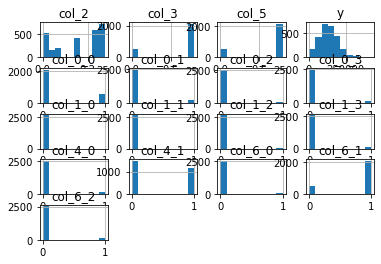

In [501]:
plt.figure(figsize=(20, 16))
transformed_df.hist()
plt.show()

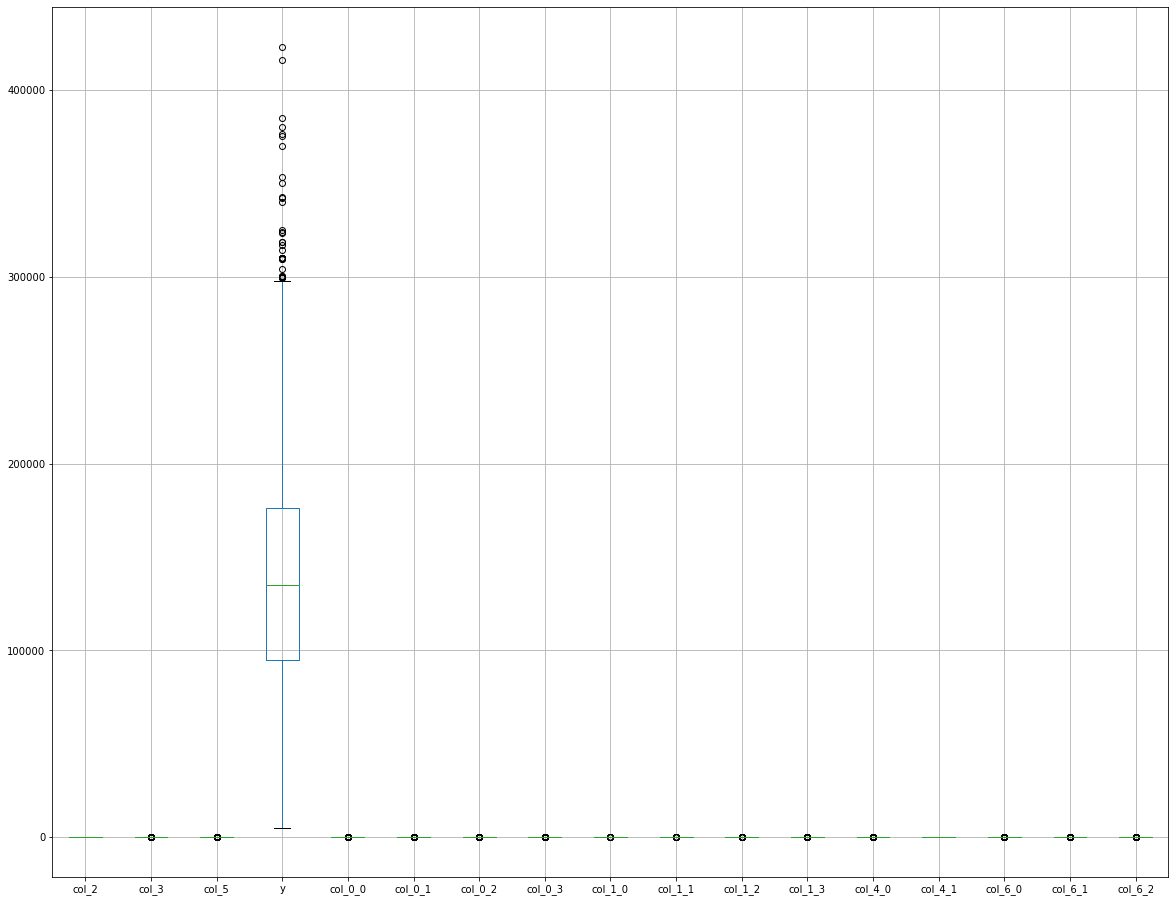

In [502]:
plt.figure(figsize=(20, 16))
transformed_df.boxplot()
plt.show()

<Figure size 1440x1152 with 0 Axes>

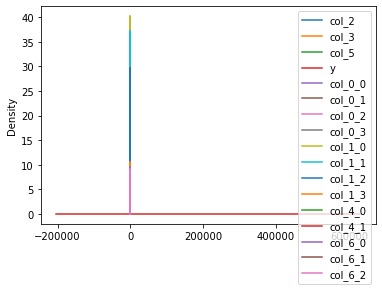

In [503]:
plt.figure(figsize=(20, 16))
transformed_df.plot.kde()
plt.show()

In [504]:
X = transformed_df.drop('y', axis=1)
y = transformed_df['y']

# Create polynomial features (e.g., up to the 3rd degree)
degree = 5
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [505]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Ridge Regression
ridge_reg = Ridge(alpha=10.0, max_iter=50000)  # You can adjust the regularization strength (alpha)
ridge_reg.fit(X_train, y_train)

# Lasso Regression
lasso_reg = Lasso(alpha=10.0, max_iter=50000)  # You can adjust the regularization strength (alpha)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate models
def evaluate_model(model, y_true, y_pred, name):
    mse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - Root Mean Squared Error: {mse:.2f}")
    print(f"{name} - R-squared: {r2:.2f}")

print("Linear Regression:")
evaluate_model(linear_reg, y_test, y_pred_linear, "Linear Regression")

print("\nRidge Regression:")
evaluate_model(ridge_reg, y_test, y_pred_ridge, "Ridge Regression")

print("\nLasso Regression:")
evaluate_model(lasso_reg, y_test, y_pred_lasso, "Lasso Regression")

Linear Regression:
Linear Regression - Root Mean Squared Error: 1495757845774242.00
Linear Regression - R-squared: -497611245582962917376.00

Ridge Regression:
Ridge Regression - Root Mean Squared Error: 54717.40
Ridge Regression - R-squared: 0.33

Lasso Regression:
Lasso Regression - Root Mean Squared Error: 54638.23
Lasso Regression - R-squared: 0.34


In [506]:
transformed_df

,col_2,col_3,col_5,y,col_0_0,col_0_1,col_0_2,col_0_3,col_1_0,col_1_1,col_1_2,col_1_3,col_4_0,col_4_1,col_6_0,col_6_1,col_6_2
0,0.223364,0.796423,0.806697,237000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.277017,0.044140,0.046043,86193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.022451,0.023212,0.021689,169200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.277017,0.796423,0.806697,58000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.002664,0.796423,0.806697,235000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,0.223364,0.796423,0.806697,102100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2624,0.001142,0.796423,0.806697,129300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2625,0.028919,0.796423,0.806697,275300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2626,0.277017,0.796423,0.806697,150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [507]:
alpha_values = [0.01, 0.1, 1.0, 10.0]
max_iter_values = [100, 500, 1000, 10000, 50000, 100000]

# Initialize lists to store results
ridge_results = []
lasso_results = []

# Perform nested cross-validation for Ridge and Lasso models
for alpha in alpha_values:
    for max_iter in max_iter_values:
        # Ridge Regression
        ridge_model = Ridge(alpha=alpha, max_iter=max_iter)
        ridge_scores = cross_val_score(ridge_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
        ridge_rmse_scores = np.sqrt(-ridge_scores)
        ridge_mean_rmse = np.mean(ridge_rmse_scores)
        ridge_results.append((alpha, max_iter, ridge_mean_rmse))
        
        # Lasso Regression
        lasso_model = Lasso(alpha=alpha, max_iter=max_iter)
        lasso_scores = cross_val_score(lasso_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
        lasso_rmse_scores = np.sqrt(-lasso_scores)
        lasso_mean_rmse = np.mean(lasso_rmse_scores)
        lasso_results.append((alpha, max_iter, lasso_mean_rmse))

# Find the best alpha and max iteration values for Ridge
best_ridge_params = min(ridge_results, key=lambda x: x[2])
print(f"Best Ridge Regression Parameters: Alpha = {best_ridge_params[0]}, Max Iterations = {best_ridge_params[1]}, RMSE = {best_ridge_params[2]}")

# Find the best alpha and max iteration values for Lasso
best_lasso_params = min(lasso_results, key=lambda x: x[2])
print(f"Best Lasso Regression Parameters: Alpha = {best_lasso_params[0]}, Max Iterations = {best_lasso_params[1]}, RMSE = {best_lasso_params[2]}")

C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.163e+11, tolerance: 1.921e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.946e+11, tolerance: 1.958e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.953e+11,

C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.477e+11, tolerance: 1.894e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.337e+11, tolerance: 1.921e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.270e+11,

C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.222e+11, tolerance: 1.828e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.711e+11, tolerance: 1.894e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.298e+11,

C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+11, tolerance: 1.852e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.120e+11, tolerance: 1.828e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.861e+11,

C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+11, tolerance: 1.958e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.810e+10, tolerance: 1.852e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rittique\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.456e+10,

Best Ridge Regression Parameters: Alpha = 10.0, Max Iterations = 100, RMSE = 56099.42791550674
Best Lasso Regression Parameters: Alpha = 10.0, Max Iterations = 100, RMSE = 59265.83658735377


In [508]:
### Models
- Elastic Net Regression
- Support Vector Regression (SVR)
- Gradient Boosting Regressor
- Random Forest Regressor
- K-Nearest Neighbors (KNN) Regression
- Bayesian Linear Regression

In [510]:
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, tol = 1e-6)  # Adjust alpha and l1_ratio as needed
elastic_net_model.fit(X_train, y_train)
elastic_net_pred = elastic_net_model.predict(X_test)
elastic_net_rmse = np.sqrt(mean_squared_error(y_test, elastic_net_pred))
elastic_net_r2 = r2_score(y_test, elastic_net_pred)
print(f'Elastic Net Regression RMSE: {elastic_net_rmse:.2f}')
print(f'Elastic Net Regression R-squared: {elastic_net_r2:.2f}')

# Support Vector Regression (SVR)
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)  # Adjust kernel, C, and epsilon as needed
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_r2 = r2_score(y_test, svr_pred)
print(f'SVR RMSE: {svr_rmse:.2f}')
print(f'SVR R-squared: {svr_r2:.2f}')

# Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)  # Adjust parameters as needed
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)
gradient_boosting_rmse = np.sqrt(mean_squared_error(y_test, gradient_boosting_pred))
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_pred)
print(f'Gradient Boosting RMSE: {gradient_boosting_rmse:.2f}')
print(f'Gradient Boosting R-squared: {gradient_boosting_r2:.2f}')

# Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)  # Adjust parameters as needed
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_pred))
random_forest_r2 = r2_score(y_test, random_forest_pred)
print(f'Random Forest RMSE: {random_forest_rmse:.2f}')
print(f'Random Forest R-squared: {random_forest_r2:.2f}')

# K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)
print(f'KNN Regression RMSE: {knn_rmse:.2f}')
print(f'KNN Regression R-squared: {knn_r2:.2f}')

# Bayesian Linear Regression
bayesian_model = BayesianRidge()  # Adjust parameters as needed
bayesian_model.fit(X_train, y_train)
bayesian_pred = bayesian_model.predict(X_test)
bayesian_rmse = np.sqrt(mean_squared_error(y_test, bayesian_pred))
bayesian_r2 = r2_score(y_test, bayesian_pred)
print(f'Bayesian Linear Regression RMSE: {bayesian_rmse:.2f}')
print(f'Bayesian Linear Regression R-squared: {bayesian_r2:.2f}')

Elastic Net Regression RMSE: 56344.08
Elastic Net Regression R-squared: 0.29
SVR RMSE: 65774.89
SVR R-squared: 0.04
Gradient Boosting RMSE: 53038.50
Gradient Boosting R-squared: 0.37
Random Forest RMSE: 51283.37
Random Forest R-squared: 0.42
KNN Regression RMSE: 56655.08
KNN Regression R-squared: 0.29
Bayesian Linear Regression RMSE: 54561.78
Bayesian Linear Regression R-squared: 0.34


In [511]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,A0,B0,C2,D1,100,E1,F2,237000
1,A1,B0,C11,D4,100,E4,F2,86193
2,A0,B0,C18,D0,0,E0,F2,169200
3,A2,B0,C11,D1,100,E1,F2,58000
4,A0,B0,C67,D1,0,E1,F2,235000
...,...,...,...,...,...,...,...,...
2623,A1,B0,C2,D1,0,E1,F2,102100
2624,A0,B0,C8,D1,0,E1,F2,129300
2625,A0,B0,C7,D1,100,E1,F2,275300
2626,A0,B0,C11,D1,100,E1,F2,150000


In [513]:
df.isnull().sum()

col_0    139
col_1     86
col_2      0
col_3      0
col_4      0
col_5      0
col_6    112
y          0
dtype: int64

In [515]:
df['col_0'] = df['col_0'].fillna(df['col_0'].mode(), inplace=True)
df['col_1'] = df['col_0'].fillna(df['col_0'].mode(), inplace=True)
df['col_6'] = df['col_0'].fillna(df['col_0'].mode(), inplace=True)

In [518]:
XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [520]:
random_forest_model = RandomForestRegressor(n_estimators=1000, max_depth=100, random_state=42)  # Adjust parameters as needed
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_pred))
random_forest_r2 = r2_score(y_test, random_forest_pred)
print(f'Random Forest RMSE: {random_forest_rmse:.2f}')
print(f'Random Forest R-squared: {random_forest_r2:.2f}')

Random Forest RMSE: 51166.35
Random Forest R-squared: 0.42
